# Sentiment Analysis: Example 1

In [68]:
import pandas as pd

In [69]:
df = pd.read_csv('../data/data_labelled.csv', usecols = ['Sentence'])
df.to_csv('../data/data_unlabelled.csv')

In [70]:
df.columns

Index(['Sentence'], dtype='object')

In [71]:
df

,Sentence
0,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po..."
2,"For the last quarter of 2010 , Componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...
4,The Swedish buyout firm has sold its remaining...
...,...
5837,RISING costs have forced packaging producer Hu...
5838,Nordic Walking was first used as a summer trai...
5839,"According shipping company Viking Line , the E..."
5840,"In the building and home improvement trade , s..."


In [72]:
print(len(df))

5842


In [73]:
df = df[:100]
print(len(df))

100


In [74]:
from transformers import pipeline
from transformers.utils import logging
logging.set_verbosity_error()

In [75]:
classifier = pipeline("sentiment-analysis",
                    model='distilbert-base-uncased-finetuned-sst-2-english')

In [76]:
classifier

In [77]:
outputs= classifier(
    [sentence for sentence in df['Sentence'] ]
)

In [78]:
df = pd.DataFrame(outputs)
print(df)

       label     score
0   POSITIVE  0.999175
1   NEGATIVE  0.993126
2   NEGATIVE  0.993958
3   POSITIVE  0.996882
4   NEGATIVE  0.991635
..       ...       ...
95  NEGATIVE  0.999630
96  NEGATIVE  0.527705
97  NEGATIVE  0.971622
98  NEGATIVE  0.998728
99  NEGATIVE  0.997273

[100 rows x 2 columns]


In [79]:
df['label'].value_counts()
freq = df['label'].value_counts().sort_values()

In [80]:
import matplotlib.pyplot as plt

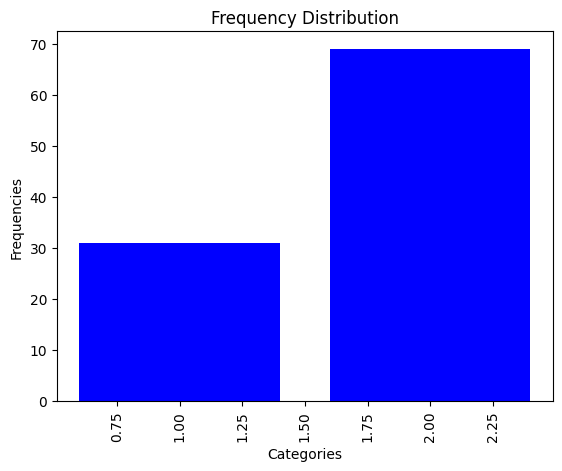

In [81]:
freq = df['label'].value_counts().sort_values()
plt.bar([i+1 for i in range(len(freq))], freq, color='blue')
plt.title('Frequency Distribution')
plt.xlabel('Categories')
plt.ylabel('Frequencies')
plt.xticks(rotation=90)
plt.show()

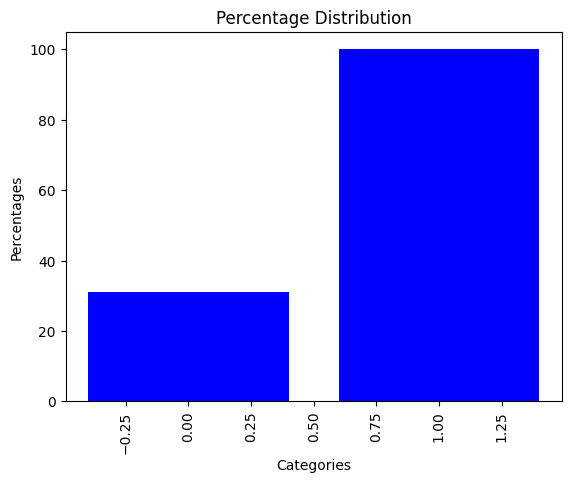

In [82]:
percentage = (freq / len(df)).round(2).cumsum() * 100
plt.bar(range(len(percentage)), percentage, color='blue')
plt.title('Percentage Distribution')
plt.xlabel('Categories')
plt.ylabel('Percentages')
plt.xticks(rotation=90)
plt.show()